In [93]:
import pandas as pd
import numpy as np

# Load the dataset again
data_logged = pd.read_csv('../../Bruce/Data/clean_oil_prediction_data.csv')

# Extract the 'date' column for indexing and the 'Real Price' column for our time series data
data_logged['date'] = pd.to_datetime(data_logged['date'])
data_logged.set_index('date', inplace=True)
ts = data_logged['Real Oil Prices']

# Display the first few rows of the time series data
ts.head()


date
1992-02-01    13.715729
1992-03-01    13.601725
1992-04-01    14.512195
1992-05-01    15.017895
1992-06-01    15.981442
Name: Real Oil Prices, dtype: float64

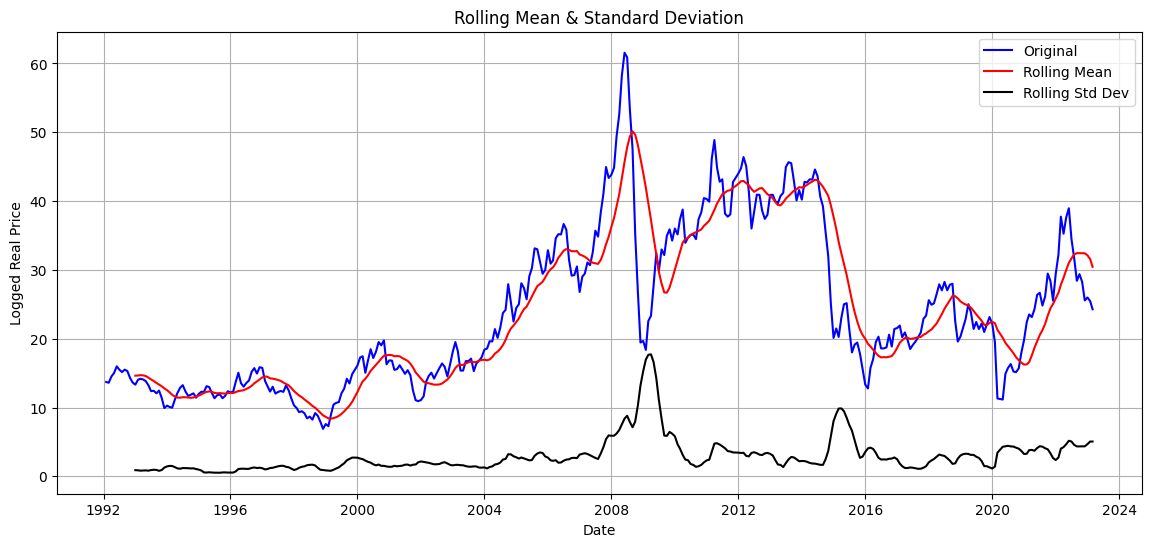

Results of Dickey-Fuller Test:
Test Statistic           -2.100836
p-value                   0.244178
# Lags Used               6.000000
# Observations Used     366.000000
Critical Value (1%)      -3.448344
Critical Value (5%)      -2.869469
Critical Value (10%)     -2.570994
dtype: float64


In [94]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
def check_stationarity(timeseries):
    
    # Determine rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(14, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std Dev')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.ylabel('Logged Real Price')
    plt.xlabel('Date')
    plt.grid(True)
    plt.show()
    
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic', 'p-value', '# Lags Used', '# Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

check_stationarity(real_price_series)

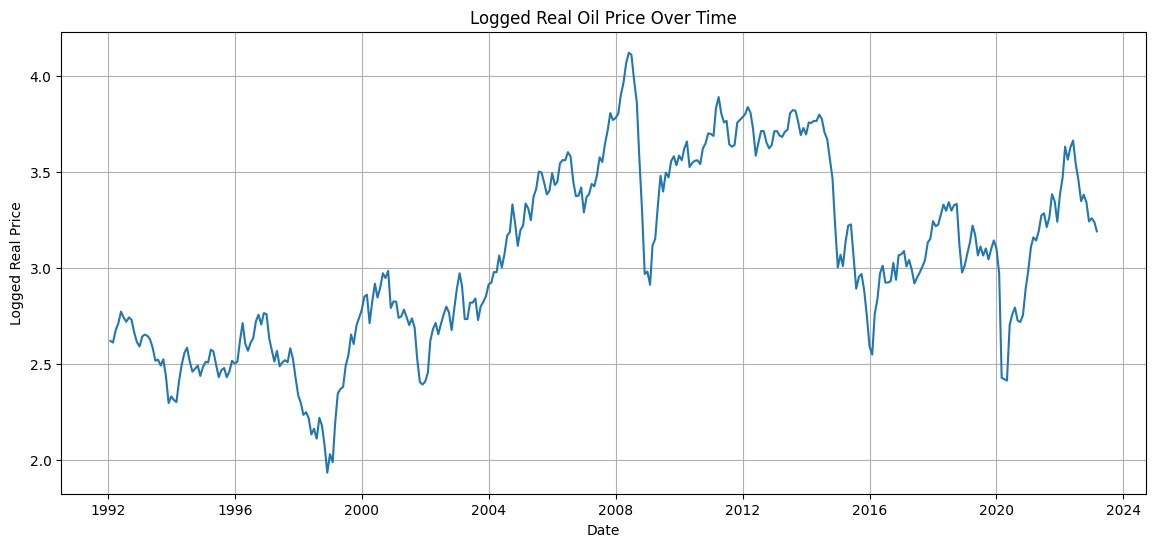

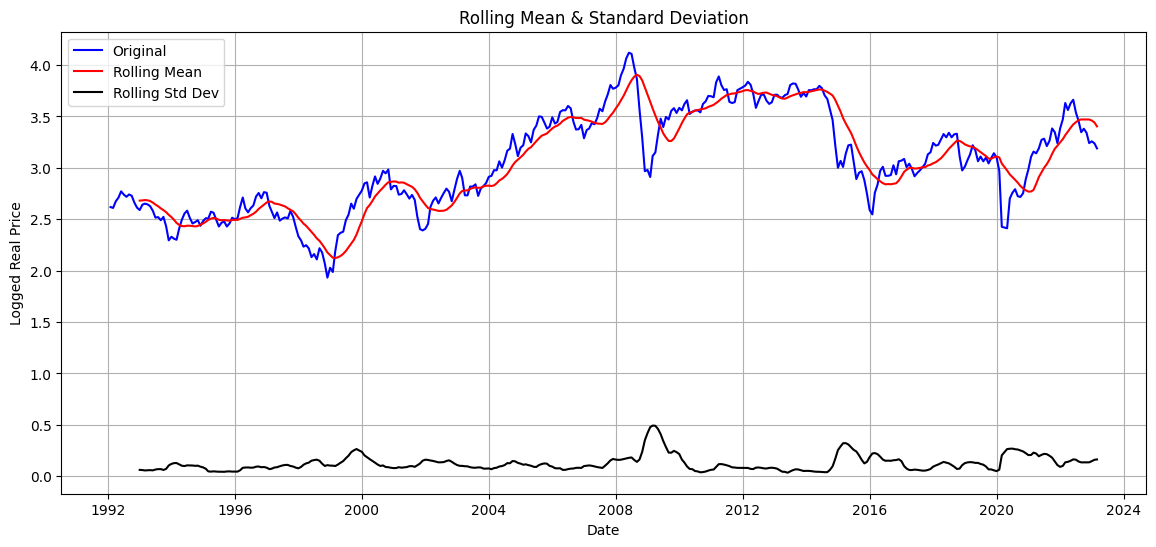

Results of Dickey-Fuller Test:
Test Statistic           -2.326851
p-value                   0.163454
# Lags Used               1.000000
# Observations Used     371.000000
Critical Value (1%)      -3.448100
Critical Value (5%)      -2.869362
Critical Value (10%)     -2.570937
dtype: float64


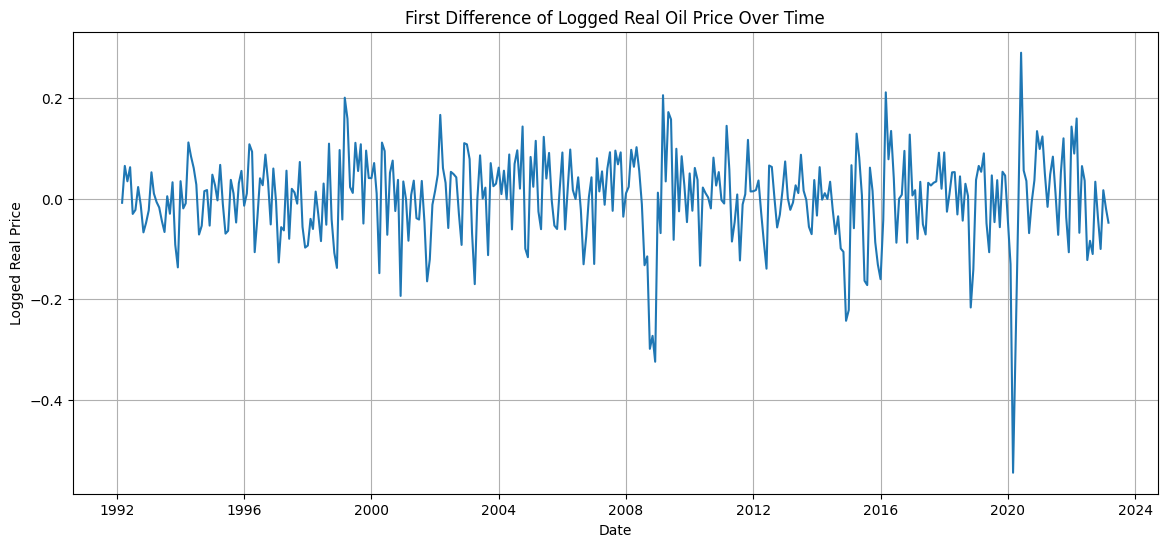

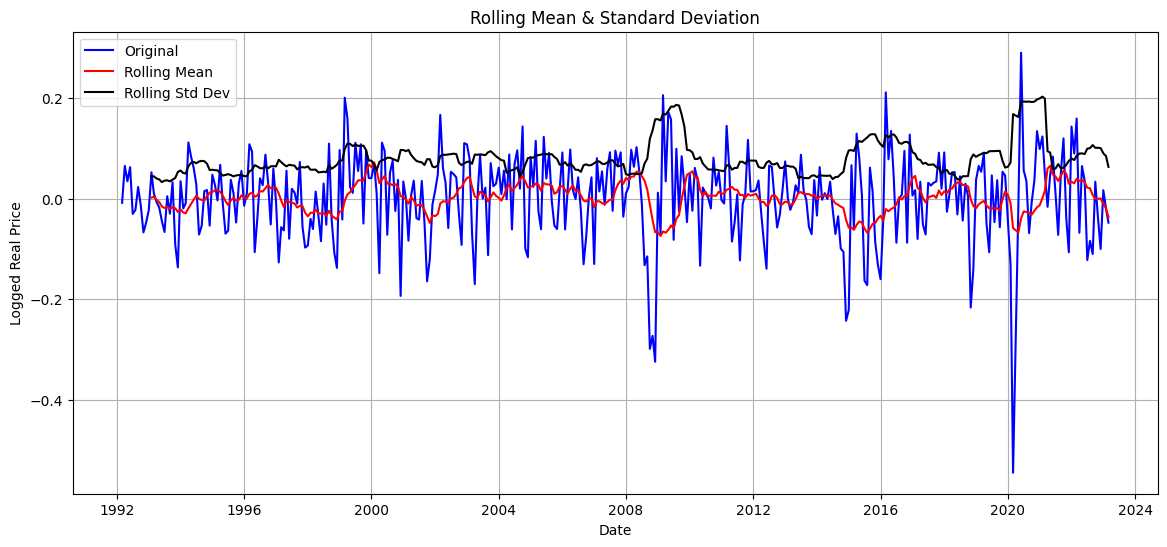

Results of Dickey-Fuller Test:
Test Statistic         -1.498842e+01
p-value                 1.134774e-27
# Lags Used             0.000000e+00
# Observations Used     3.710000e+02
Critical Value (1%)    -3.448100e+00
Critical Value (5%)    -2.869362e+00
Critical Value (10%)   -2.570937e+00
dtype: float64


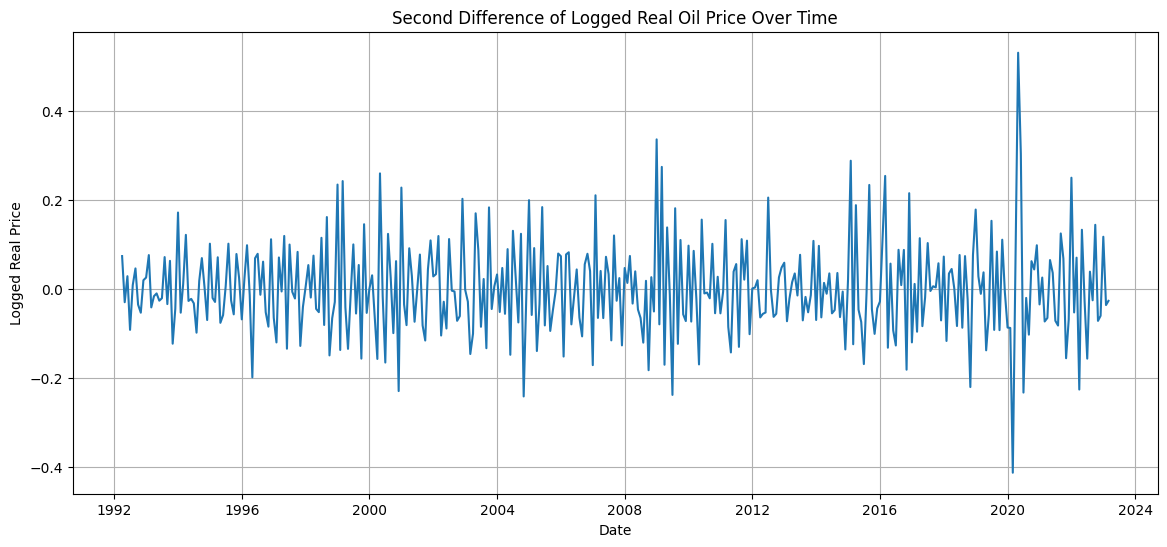

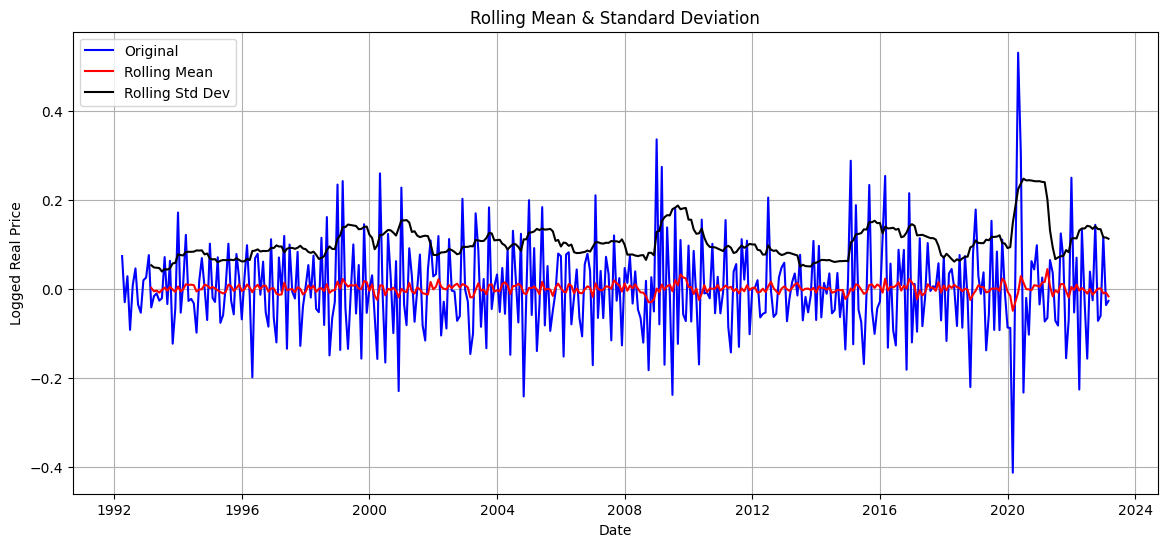

Results of Dickey-Fuller Test:
Test Statistic         -7.494852e+00
p-value                 4.407142e-11
# Lags Used             1.700000e+01
# Observations Used     3.530000e+02
Critical Value (1%)    -3.449011e+00
Critical Value (5%)    -2.869763e+00
Critical Value (10%)   -2.571151e+00
dtype: float64


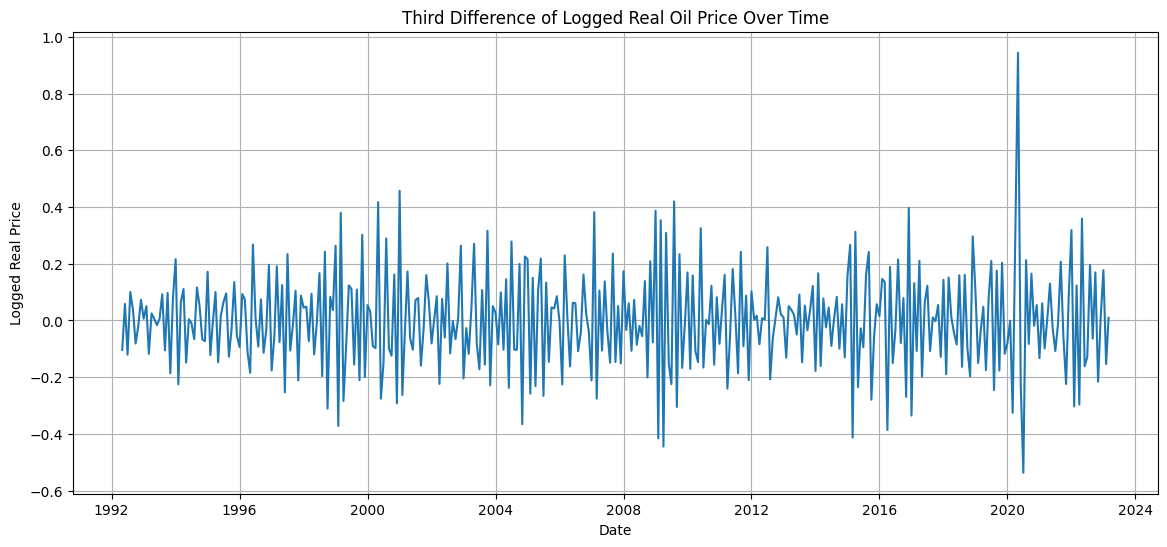

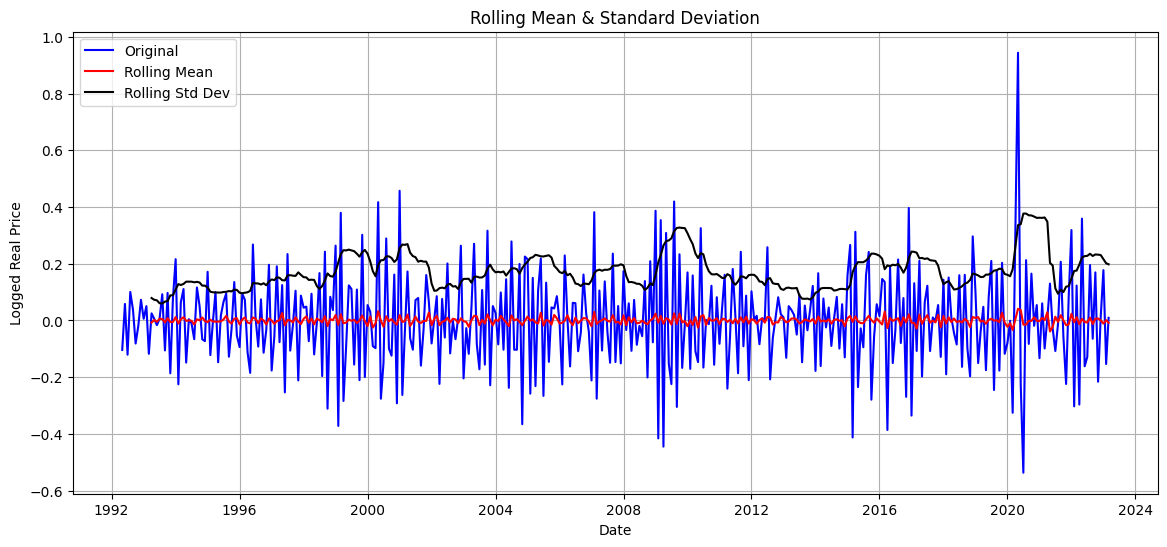

Results of Dickey-Fuller Test:
Test Statistic         -1.084575e+01
p-value                 1.574035e-19
# Lags Used             1.500000e+01
# Observations Used     3.540000e+02
Critical Value (1%)    -3.448958e+00
Critical Value (5%)    -2.869739e+00
Critical Value (10%)   -2.571138e+00
dtype: float64


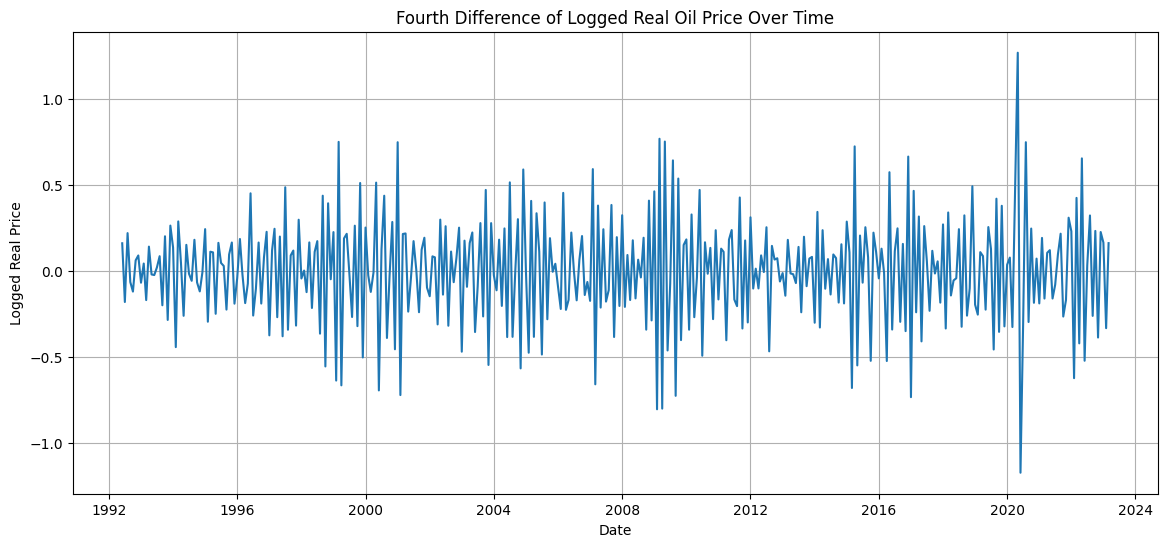

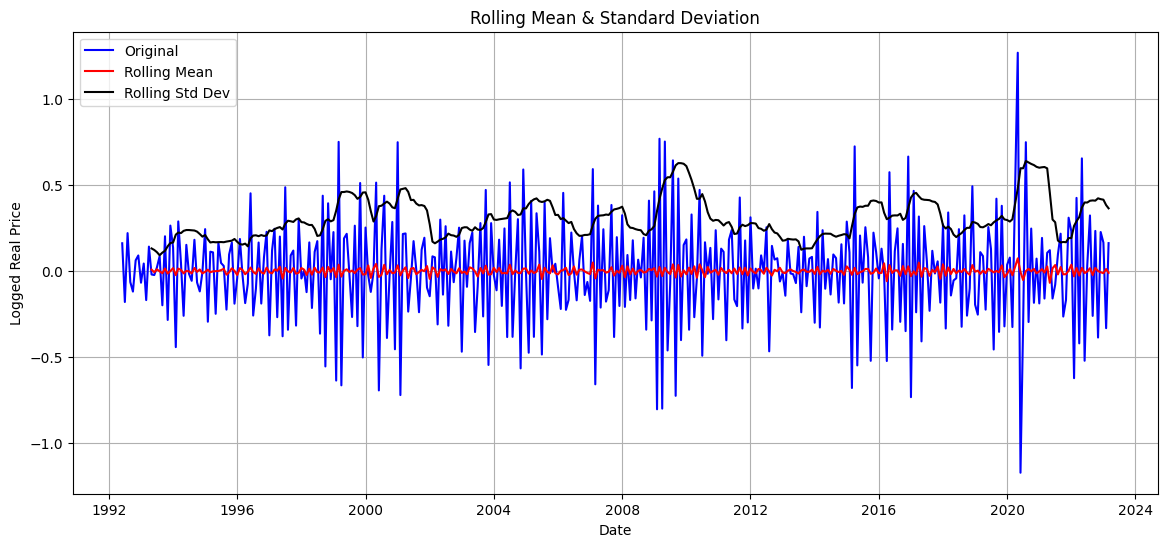

Results of Dickey-Fuller Test:
Test Statistic         -1.108158e+01
p-value                 4.297934e-20
# Lags Used             1.700000e+01
# Observations Used     3.510000e+02
Critical Value (1%)    -3.449119e+00
Critical Value (5%)    -2.869810e+00
Critical Value (10%)   -2.571176e+00
dtype: float64


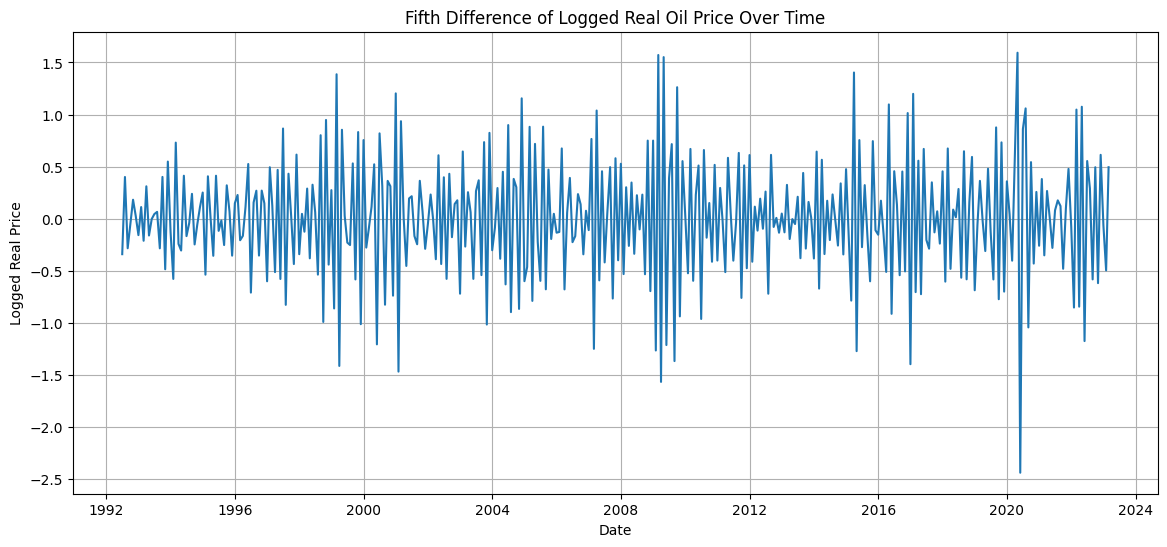

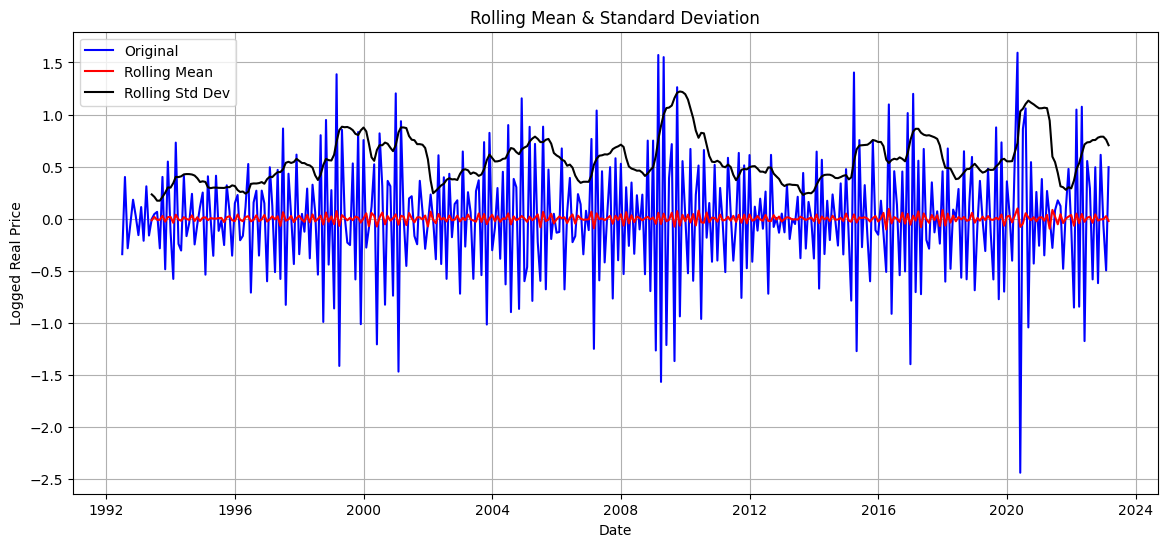

Results of Dickey-Fuller Test:
Test Statistic         -1.335328e+01
p-value                 5.613120e-25
# Lags Used             1.700000e+01
# Observations Used     3.500000e+02
Critical Value (1%)    -3.449173e+00
Critical Value (5%)    -2.869833e+00
Critical Value (10%)   -2.571188e+00
dtype: float64


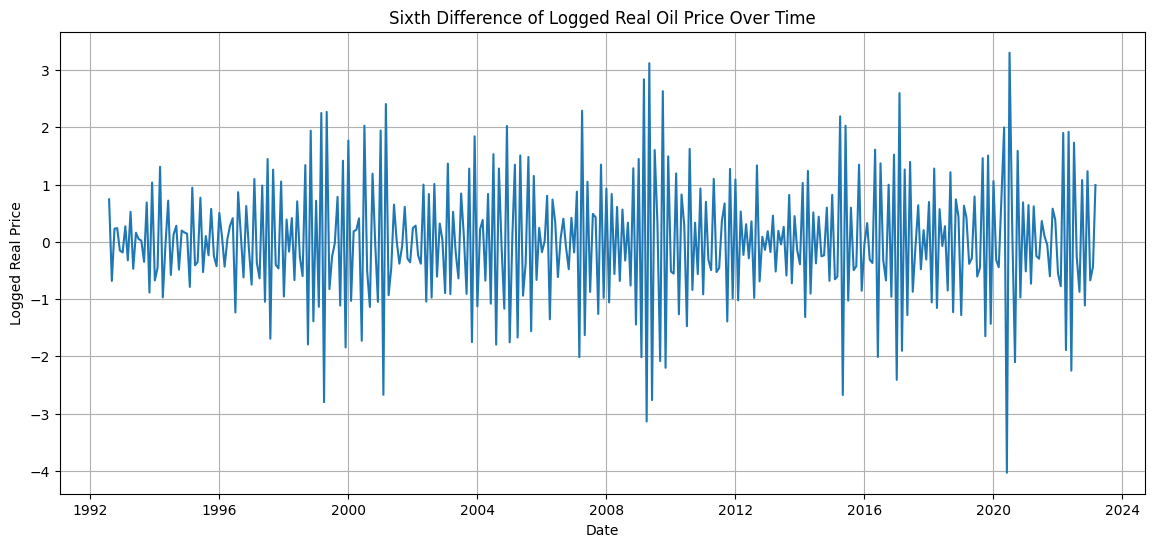

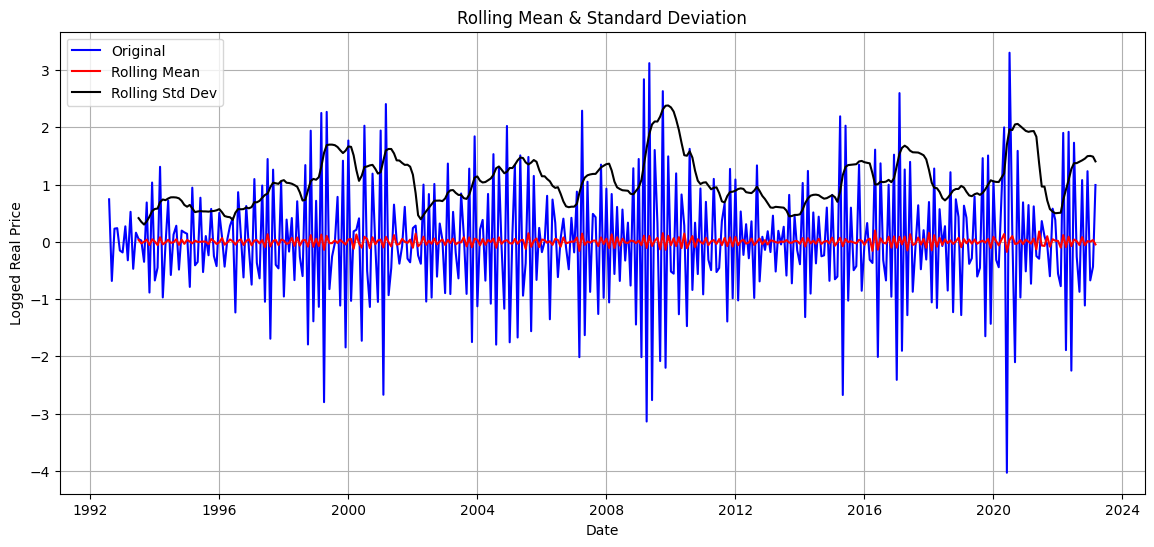

Results of Dickey-Fuller Test:
Test Statistic         -1.395273e+01
p-value                 4.670226e-26
# Lags Used             1.700000e+01
# Observations Used     3.490000e+02
Critical Value (1%)    -3.449227e+00
Critical Value (5%)    -2.869857e+00
Critical Value (10%)   -2.571201e+00
dtype: float64


c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


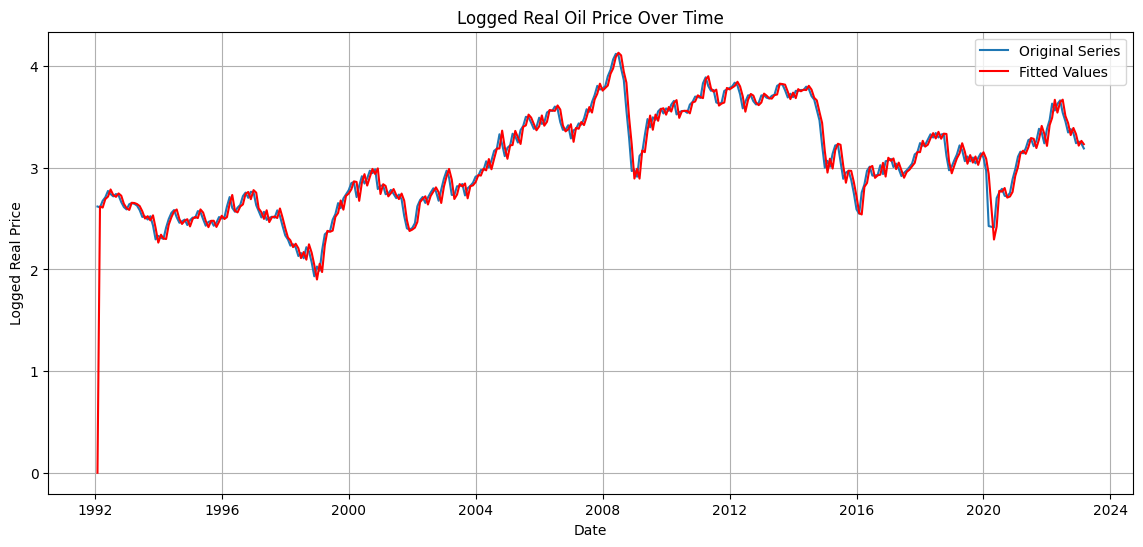

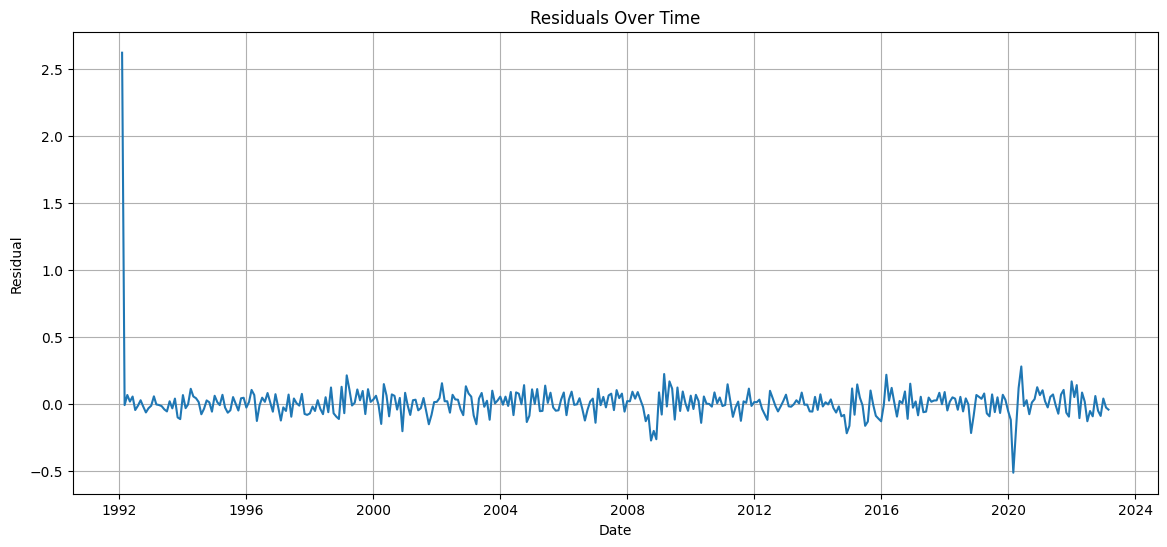

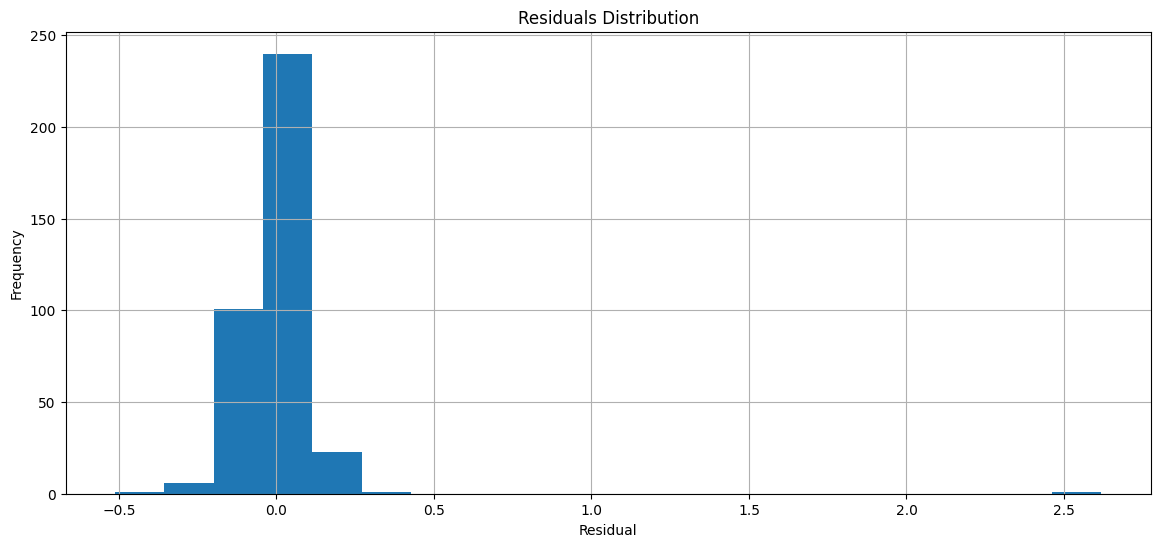

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


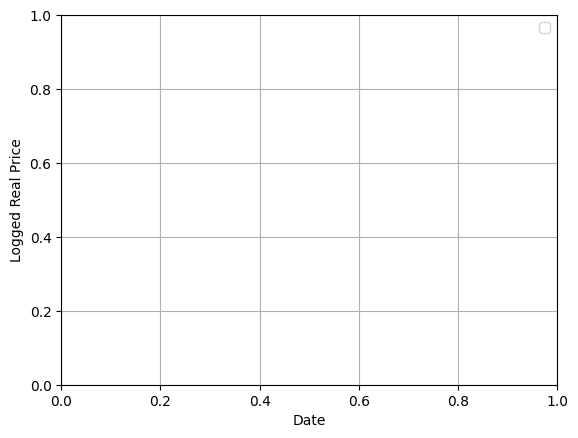

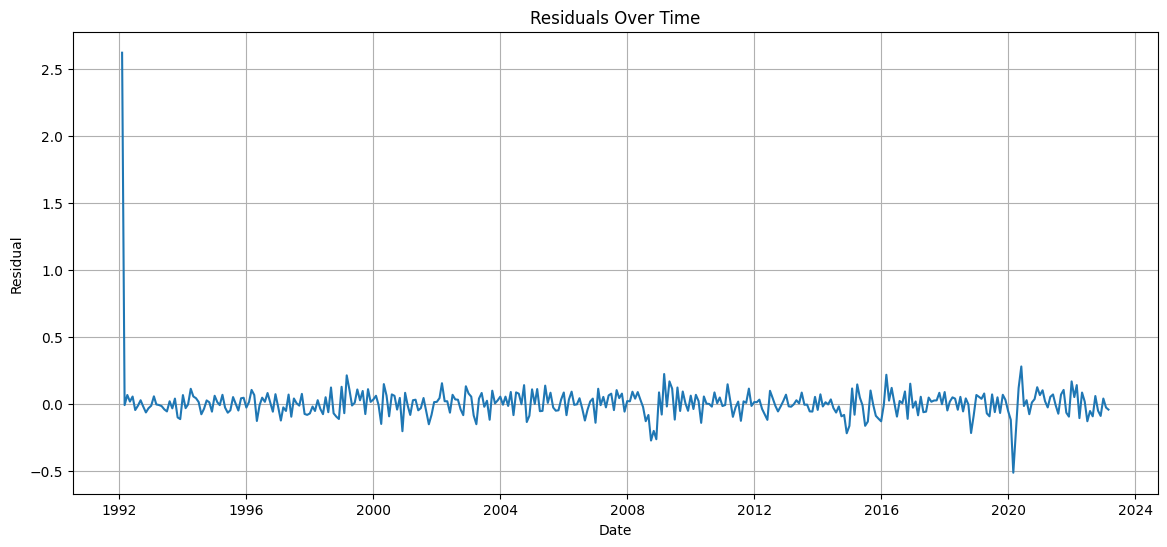

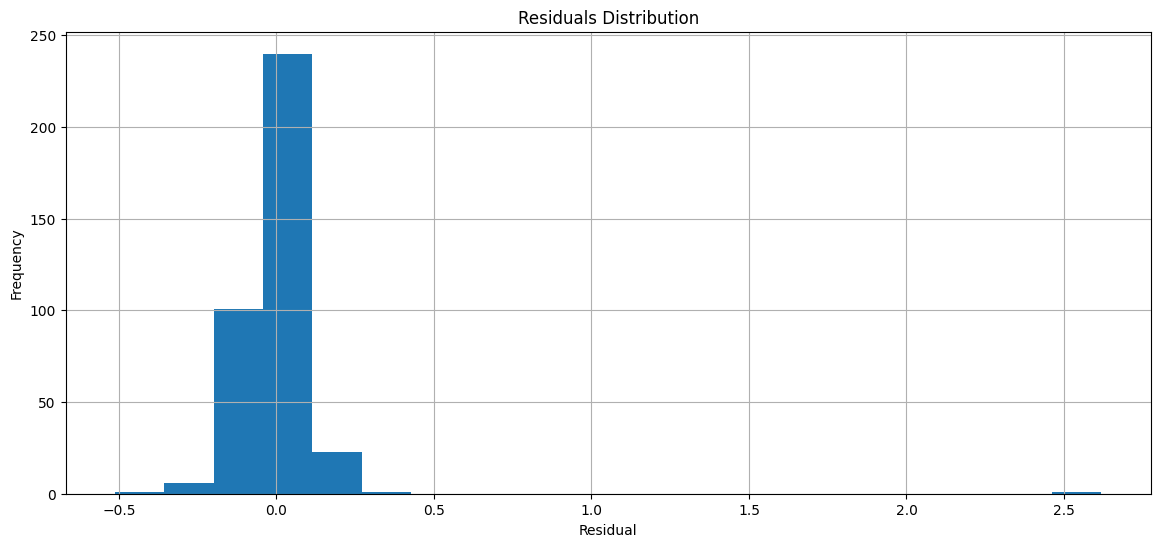

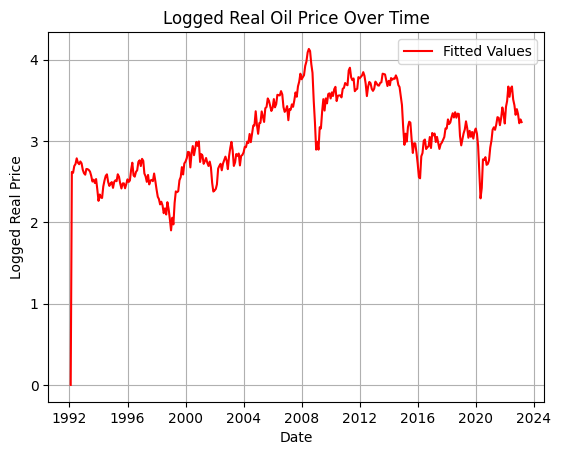

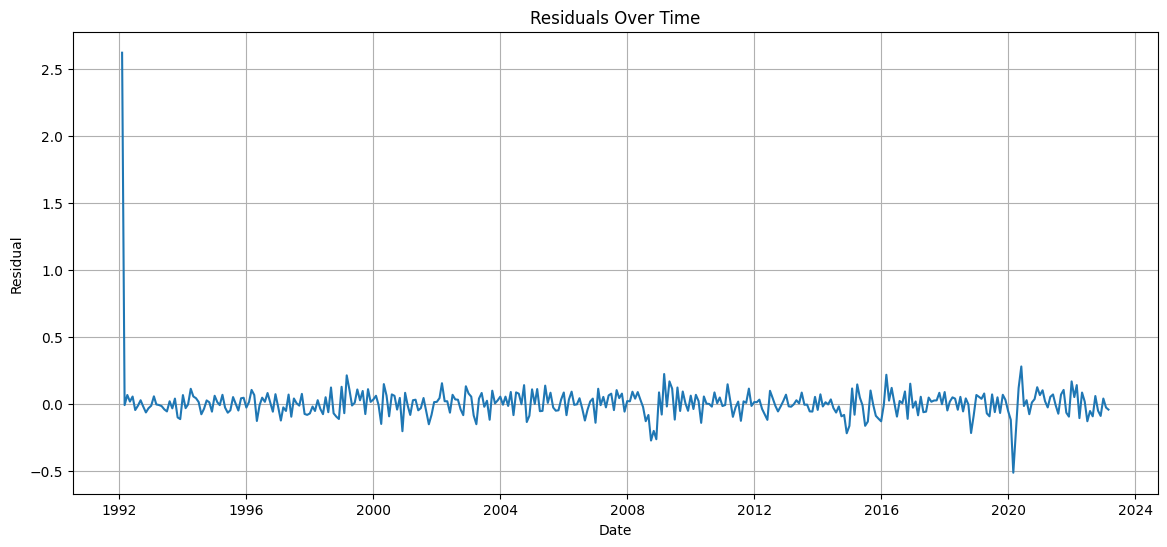

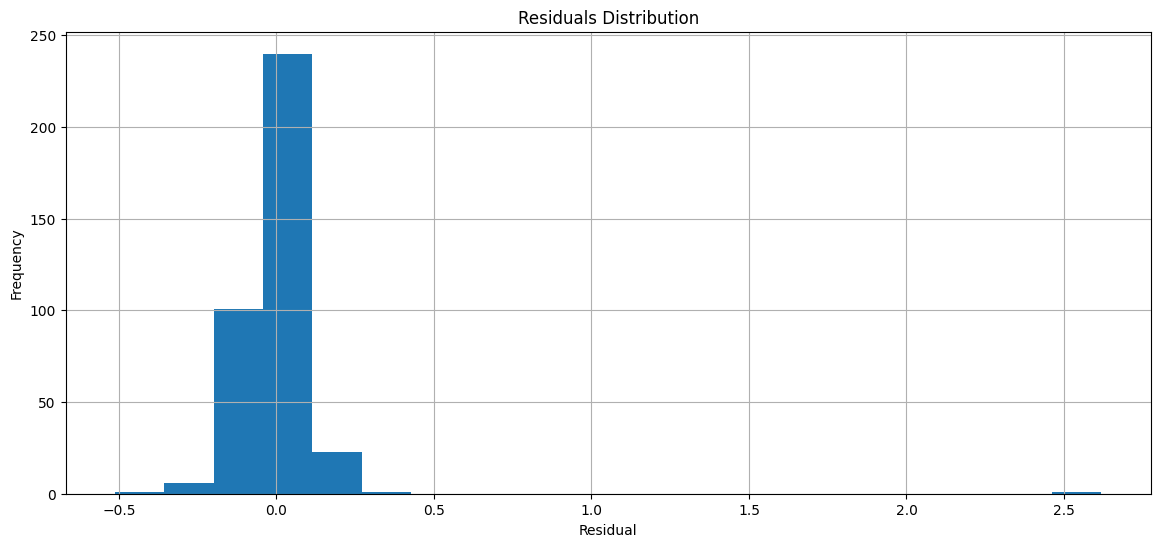

<Figure size 1400x600 with 0 Axes>

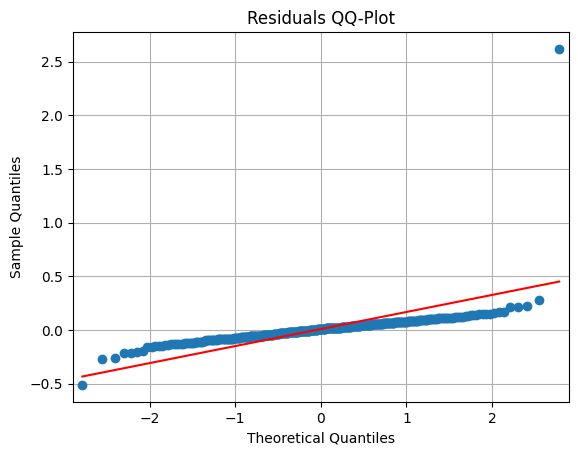

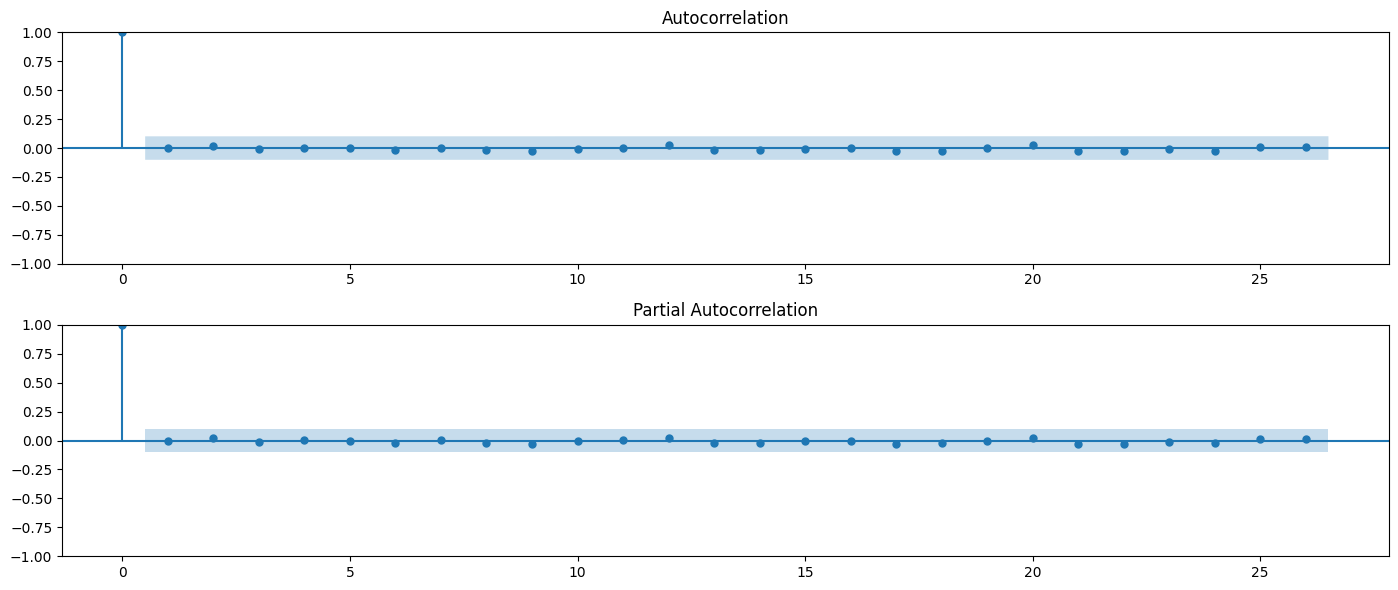

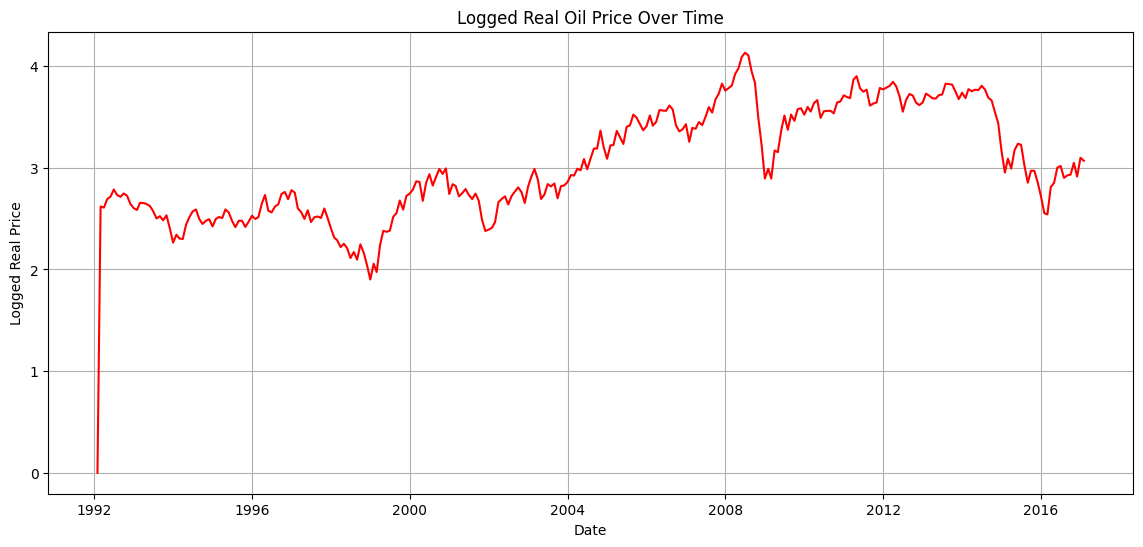

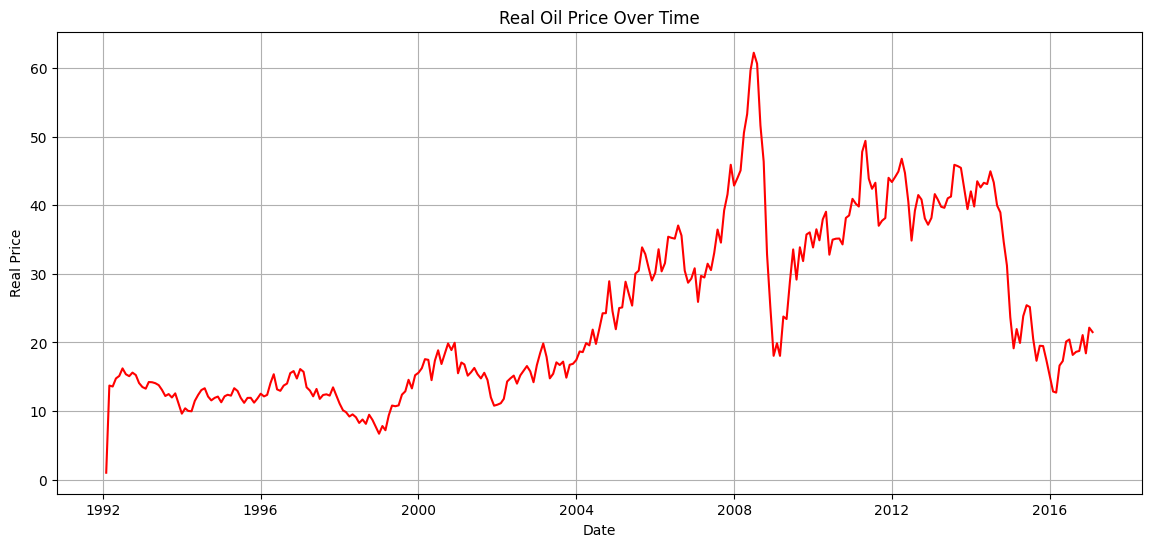

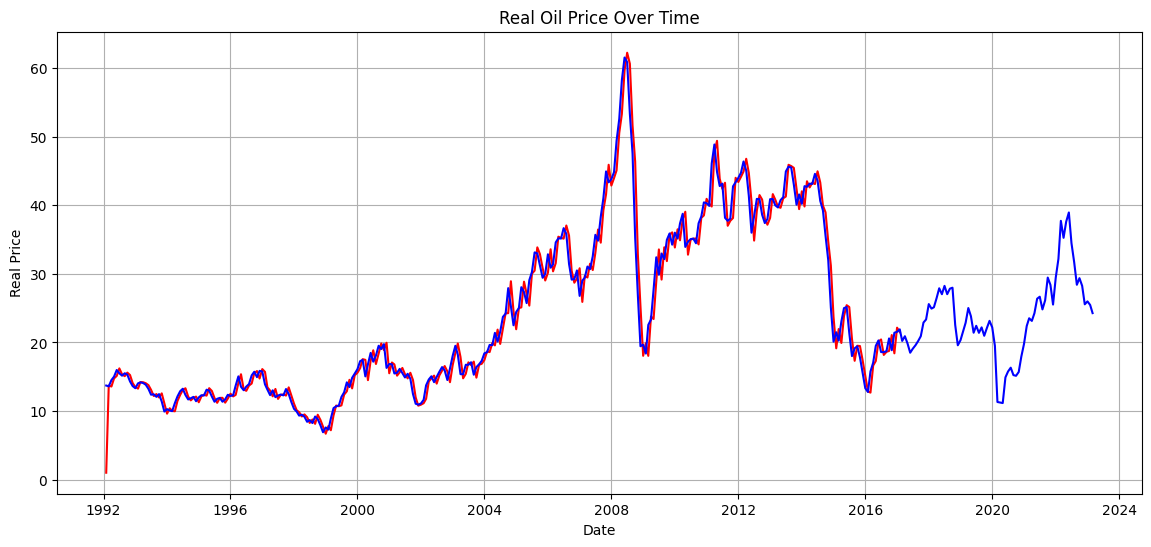

In [95]:
logged_price_series = np.log(real_price_series)

# Plot the logged series
plt.figure(figsize=(14, 6))
plt.plot(logged_price_series)
plt.title("Logged Real Oil Price Over Time")
plt.ylabel("Logged Real Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()

from statsmodels.tsa.arima.model import ARIMA

# Check for stationarity
check_stationarity(logged_price_series)

# Take the first difference of the logged series
first_diff_logged_price_series = logged_price_series.diff().dropna()

# Plot the first difference of the logged series
plt.figure(figsize=(14, 6))
plt.plot(first_diff_logged_price_series)
plt.title("First Difference of Logged Real Oil Price Over Time")
plt.ylabel("Logged Real Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Check for stationarity
check_stationarity(first_diff_logged_price_series)

# Take the second difference of the logged series
second_diff_logged_price_series = logged_price_series.diff().diff().dropna()

# Plot the second difference of the logged series
plt.figure(figsize=(14, 6))
plt.plot(second_diff_logged_price_series)
plt.title("Second Difference of Logged Real Oil Price Over Time")
plt.ylabel("Logged Real Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Check for stationarity
check_stationarity(second_diff_logged_price_series)

# Take the third difference of the logged series
third_diff_logged_price_series = logged_price_series.diff().diff().diff().dropna()

# Plot the third difference of the logged series
plt.figure(figsize=(14, 6))
plt.plot(third_diff_logged_price_series)
plt.title("Third Difference of Logged Real Oil Price Over Time")
plt.ylabel("Logged Real Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Check for stationarity
check_stationarity(third_diff_logged_price_series)

# Take the fourth difference of the logged series
fourth_diff_logged_price_series = logged_price_series.diff().diff().diff().diff().dropna()

# Plot the fourth difference of the logged series
plt.figure(figsize=(14, 6))
plt.plot(fourth_diff_logged_price_series)
plt.title("Fourth Difference of Logged Real Oil Price Over Time")
plt.ylabel("Logged Real Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Check for stationarity
check_stationarity(fourth_diff_logged_price_series)

# Take the fifth difference of the logged series
fifth_diff_logged_price_series = logged_price_series.diff().diff().diff().diff().diff().dropna()

# Plot the fifth difference of the logged series
plt.figure(figsize=(14, 6))
plt.plot(fifth_diff_logged_price_series)
plt.title("Fifth Difference of Logged Real Oil Price Over Time")
plt.ylabel("Logged Real Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Check for stationarity
check_stationarity(fifth_diff_logged_price_series)

# Take the sixth difference of the logged series
sixth_diff_logged_price_series = logged_price_series.diff().diff().diff().diff().diff().diff().dropna()

# Plot the sixth difference of the logged series
plt.figure(figsize=(14, 6))
plt.plot(sixth_diff_logged_price_series)
plt.title("Sixth Difference of Logged Real Oil Price Over Time")
plt.ylabel("Logged Real Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Check for stationarity
check_stationarity(sixth_diff_logged_price_series)

# Fit the model
model = ARIMA(logged_price_series, order=(1, 1, 1))
results = model.fit()

# Plot the original series and the forecasted series
plt.figure(figsize=(14, 6))
plt.plot(logged_price_series, label='Original Series')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.title("Logged Real Oil Price Over Time")
plt.ylabel("Logged Real Price")
plt.xlabel("Date")
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot the residuals
plt.figure(figsize=(14, 6))
plt.plot(results.resid)
plt.title("Residuals Over Time")
plt.ylabel("Residual")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Plot the residuals distribution
plt.figure(figsize=(14, 6))
plt.hist(results.resid, bins=20)
plt.title("Residuals Distribution")
plt.ylabel("Frequency")
plt.xlabel("Residual")
plt.grid(True)
plt.show()
plt.ylabel("Logged Real Price")
plt.xlabel("Date")
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot the residuals
plt.figure(figsize=(14, 6))
plt.plot(results.resid)
plt.title("Residuals Over Time")
plt.ylabel("Residual")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Plot the residuals distribution
plt.figure(figsize=(14, 6))
plt.hist(results.resid, bins=20)
plt.title("Residuals Distribution")
plt.ylabel("Frequency")
plt.xlabel("Residual")
plt.grid(True)
plt.show()
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.title("Logged Real Oil Price Over Time")
plt.ylabel("Logged Real Price")
plt.xlabel("Date")
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot the residuals
plt.figure(figsize=(14, 6))
plt.plot(results.resid)
plt.title("Residuals Over Time")
plt.ylabel("Residual")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Plot the residuals distribution
plt.figure(figsize=(14, 6))
plt.hist(results.resid, bins=20)
plt.title("Residuals Distribution")
plt.ylabel("Frequency")
plt.xlabel("Residual")
plt.grid(True)
plt.show()

# Plot the residuals QQ-plot
from statsmodels.graphics.api import qqplot

plt.figure(figsize=(14, 6))
qqplot(results.resid, line='s')
plt.title("Residuals QQ-Plot")
plt.grid(True)
plt.show()

# Plot the ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 6))
ax1 = plt.subplot(211)
plot_acf(results.resid, ax=ax1)
ax2 = plt.subplot(212)
plot_pacf(results.resid, ax=ax2)
plt.tight_layout()
plt.show()

# Plot the forecasted series
plt.figure(figsize=(14, 6))
plt.plot(results.predict(0, 300), color='red')
plt.title("Logged Real Oil Price Over Time")
plt.ylabel("Logged Real Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Plot the forecasted series
plt.figure(figsize=(14, 6))
plt.plot(np.exp(results.predict(0, 300)), color='red')
plt.title("Real Oil Price Over Time")
plt.ylabel("Real Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Plot the forecasted series
plt.figure(figsize=(14, 6))
plt.plot(np.exp(results.predict(0, 300)), color='red')
plt.plot(real_price_series, color='blue')
plt.title("Real Oil Price Over Time")
plt.ylabel("Real Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()



date
1992-02-01     1.000000
1992-03-01    13.715729
1992-04-01    13.574178
1992-05-01    14.750998
1992-06-01    15.121791
1992-07-01    16.219499
1992-08-01    15.361984
1992-09-01    15.085107
1992-10-01    15.602525
1992-11-01    15.248306
1992-12-01    14.082313
1993-01-01    13.499507
1993-02-01    13.263077
1993-03-01    14.229110
1993-04-01    14.196264
1993-05-01    14.056177
1993-06-01    13.776668
1993-07-01    13.088373
1993-08-01    12.191053
1993-09-01    12.471320
1993-10-01    11.975673
1993-11-01    12.576120
1993-12-01    11.111067
1994-01-01     9.615941
1994-02-01    10.394796
1994-03-01    10.014455
1994-04-01     9.962003
1994-05-01    11.470273
1994-06-01    12.349679
1994-07-01    13.059481
1994-08-01    13.321659
Name: predicted_mean, dtype: float64
date
1992-02-01     1.000000
1992-03-01    13.715729
1992-04-01    13.574178
1992-05-01    14.750998
1992-06-01    15.121791
                ...    
1996-10-01    15.524367
1996-11-01    15.827505
1996-12-01    14.

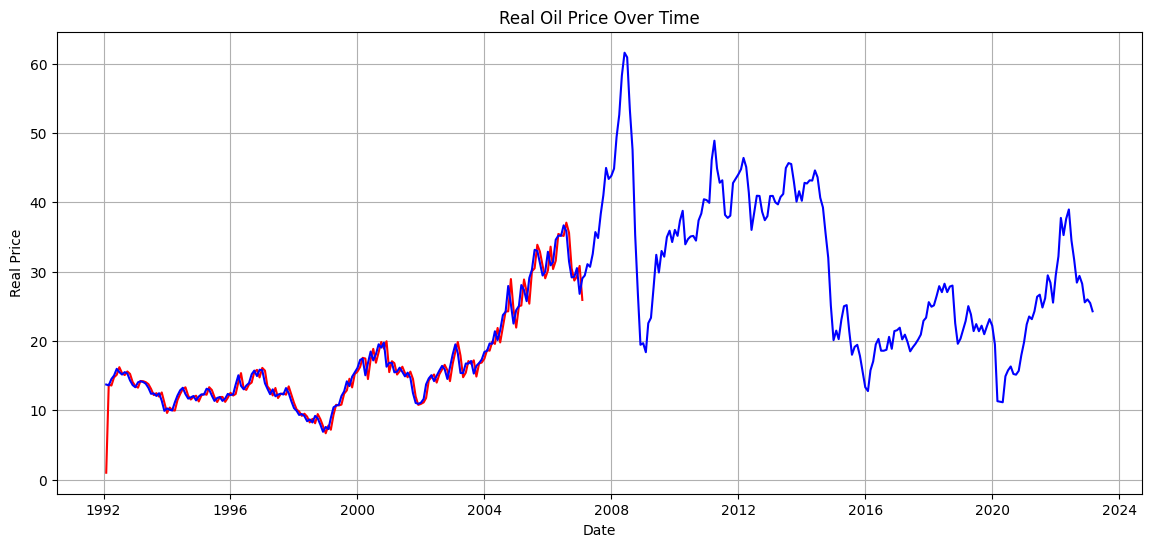

In [96]:
# Predict future 30, 60 and 180 days
print(np.exp(results.predict(0, 30)))
print(np.exp(results.predict(0, 60)))
print(np.exp(results.predict(0, 180)))

# Plot the forecasted series
plt.figure(figsize=(14, 6))
plt.plot(np.exp(results.predict(0, 180)), color='red')
plt.plot(real_price_series, color='blue')
plt.title("Real Oil Price Over Time")
plt.ylabel("Real Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()




